In [2]:
#using Pkg; Pkg.instantiate()
using EVQueues, Plots

In [17]:
lambda=60.0;
mu=1.0;
gamma=1.0;
C=60.0;

Tfinal=100.0;

In [18]:
df = generate_Poisson_stream(lambda,mu,gamma,Tfinal);

edf = ev_edf_trace(df,C)
compute_statistics!(edf)

lifo = ev_lifo_trace(df,C)
compute_statistics!(lifo)

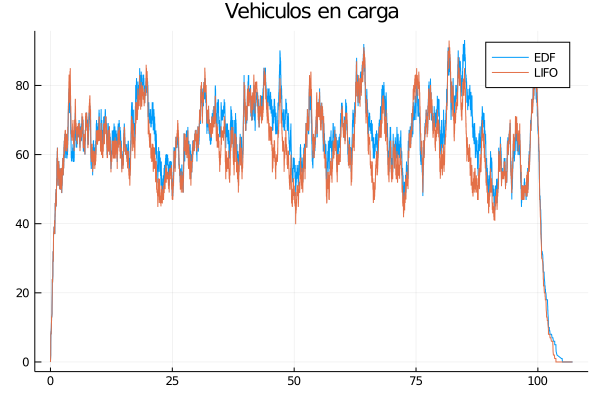

In [19]:
plot(edf.timetrace.T,edf.timetrace.X , label="EDF", title="Vehiculos en carga")
plot!(lifo.timetrace.T,lifo.timetrace.X , label="LIFO")


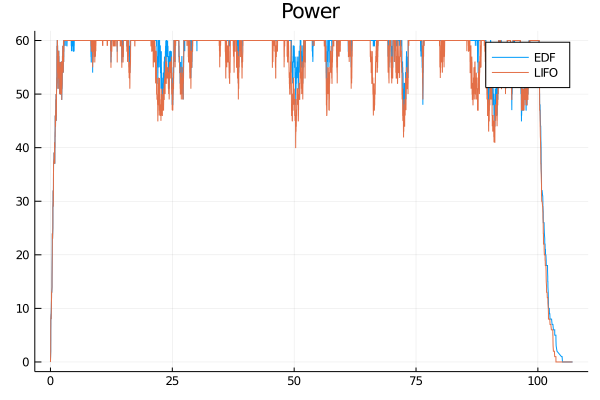

In [20]:
plot(edf.timetrace.T,edf.timetrace.P , label="EDF", title="Power")
plot!(lifo.timetrace.T,lifo.timetrace.P , label="LIFO")


In [21]:
edf_evs = sort(edf.EVs,by=ev->ev.arrivalTime)
lifo_evs = sort(lifo.EVs,by=ev->ev.arrivalTime)

#para recortar el transitorio
n=1000;

edf_evs = edf_evs[n:end-n]
lifo_evs = lifo_evs[n:end-n]

S_edf = [ev.requestedEnergy for ev in edf_evs];
S_lifo = [ev.requestedEnergy for ev in lifo_evs];

Sr_edf = [ev.departureWorkload for ev in edf_evs];
Sr_lifo = [ev.departureWorkload for ev in lifo_evs];

Sa_edf = S_edf - Sr_edf
Sa_lifo = S_lifo - Sr_lifo;

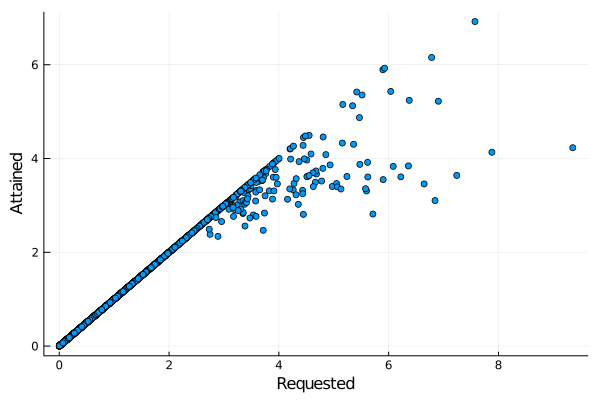

In [22]:
scatter(S_edf,Sa_edf,legend=:none,xlabel="Requested",ylabel="Attained")

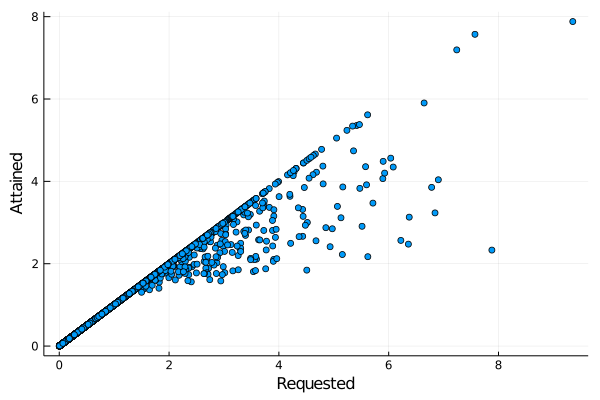

In [23]:
scatter(S_lifo,Sa_lifo,legend=:none,xlabel="Requested",ylabel="Attained")

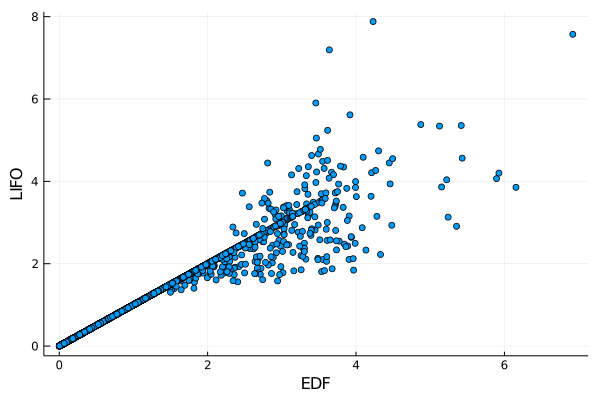

In [24]:
scatter(Sa_edf,Sa_lifo,legend=:none,xlabel="EDF",ylabel="LIFO")

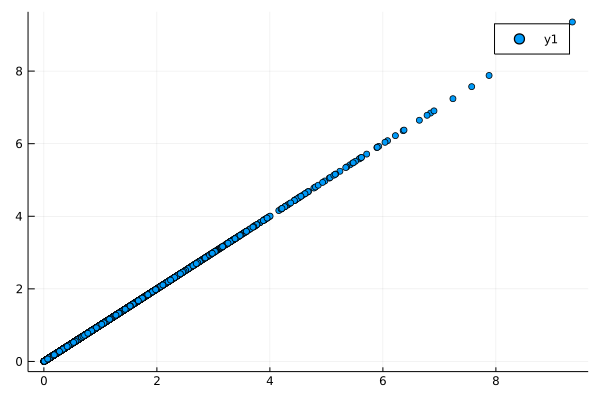

In [25]:
scatter(S_edf,S_lifo)

In [26]:
edf.stats.avgW

0.01964958469006245

In [27]:
lifo.stats.avgW

0.03971290119671656